Name: Idhika Vaidya

PRN: 22070243021

India Export Trade Data Forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import numpy as np

1. Data Collection

In [ ]:
df3 = pd.read_excel(r'/content/Export values.xlsx')

In [ ]:
#df2.head()

2. Data Preprocessing

In [ ]:
df3.head()

,Year,Export value
0,1999,36.3
1,2000,43.1
2,2001,42.5
3,2002,44.5
4,2003,48.3


In [ ]:
df3.shape

(25, 2)

In [ ]:
print(df3)

    Year  Export value
0   1999         36.30
1   2000         43.10
2   2001         42.50
3   2002         44.50
4   2003         48.30
5   2004         57.24
6   2005         69.18
7   2006         76.23
8   2007        112.00
9   2008        176.40
10  2009        168.20
11  2010        201.10
12  2011        299.40
13  2012        298.40
14  2013        313.20
15  2014        318.20
16  2015        310.30
17  2016        262.30
18  2017        275.80
19  2018        303.52
20  2019        330.07
21  2020        314.31
22  2021        420.00
23  2022        676.53
24  2023        770.18


In [ ]:
#Exploratory Data Analysis

In [ ]:
# Summary statistics
print("Summary Statistics:")
print(df3.describe())
print()

Summary Statistics:
              Year  Export value
count    25.000000     25.000000
mean   2011.000000    238.690400
std       7.359801    189.026739
min    1999.000000     36.300000
25%    2005.000000     69.180000
50%    2011.000000    262.300000
75%    2017.000000    313.200000
max    2023.000000    770.180000



In [ ]:
# Rename columns
df3 = df3.rename(columns={'Year': 'year', 'Export value': 'value'})

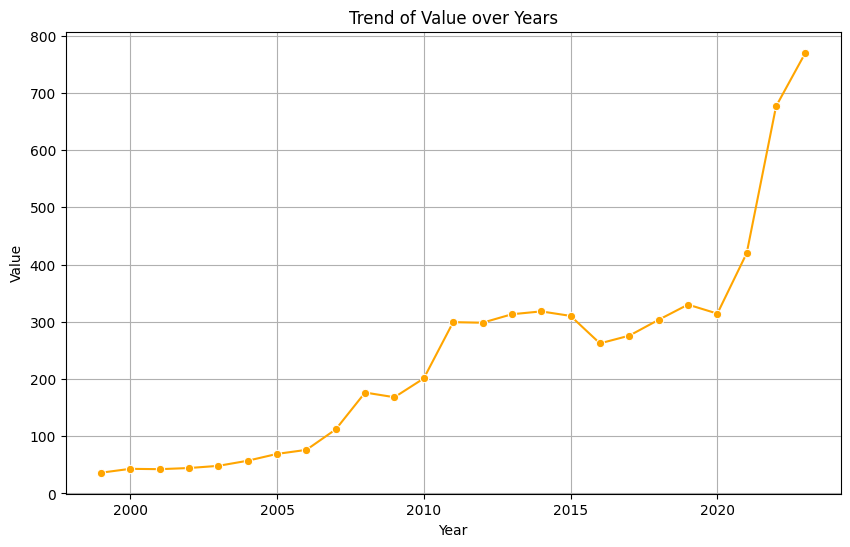

In [ ]:
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df3, x='year', y='value', marker='o', color='orange')
plt.title('Trend of Value over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

3. Data Preparation

In [ ]:
# Split the dataset into training (2010-2018) and testing (2019-2021) data
train_data = df3[(df3['year'] >= 1999) & (df3['year'] <= 2019)]
test_data = df3[(df3['year'] >= 2020) & (df3['year'] <= 2023)]

# Extract the features and target variable
X_train = train_data[['year']]
y_train = train_data['value']

X_test = test_data[['year']]
y_test_actual = test_data['value']


In [ ]:
# The previous step involves model selection and training using historical data.
# The selected model will be used later to predict future values for the years 2022-2027.

4. Model Selection

In [ ]:
# Define a function to evaluate ARIMA model
def evaluate_arima(order):
    model = ARIMA(endog=y_train, order=order)
    model_fit = model.fit()
    y_pred = model_fit.forecast(steps=len(X_test))

    mae = mean_absolute_error(y_test_actual, y_pred)
    mse = mean_squared_error(y_test_actual, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test_actual, y_pred)

    return mae, mse, rmse, r2

# Define a function to evaluate SARIMA model
def evaluate_sarima(order, seasonal_order):
    model = SARIMAX(endog=y_train, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    y_pred = model_fit.forecast(steps=len(X_test))

    mae = mean_absolute_error(y_test_actual, y_pred)
    mse = mean_squared_error(y_test_actual, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_test_actual, y_pred)

    return mae, mse, rmse, r2



In [ ]:
# Initialize machine learning and time series models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.1),
    'Ridge Regression': Ridge(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=0),
    #Default parameters are used to train ARIMA and SARIMA
    'ARIMA': evaluate_arima((1, 1, 1)),  # Define the order (p,d,q)
    'SARIMA': evaluate_sarima((1, 1, 1), (1, 1, 0, 12))  # Define order and seasonal_order
}

# Dictionary to store results
results1 = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R-squared': []}

for model_name, model in models.items():
    if isinstance(model, tuple):
        # ARIMA or SARIMA results
        mae, mse, rmse, r2 = model
    else:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict the values for the test years (2010-2015)
        y_test_predicted = model.predict(X_test)

        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test_actual, y_test_predicted)
        mse = mean_squared_error(y_test_actual, y_test_predicted)
        rmse = sqrt(mse)
        r2 = r2_score(y_test_actual, y_test_predicted)

    # Append results to the dictionary
    results1['Model'].append(model_name)
    results1['MAE'].append(mae)
    results1['MSE'].append(mse)
    results1['RMSE'].append(rmse)
    results1['R-squared'].append(r2)

# Create a DataFrame from the results
model_performance = pd.DataFrame(results1)

# Print or display the results
model_performance


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,174.393519,48262.570706,219.687439,-0.410683
1,Lasso Regression,174.412610,48273.398811,219.712082,-0.411000
2,Ridge Regression,174.409564,48271.670714,219.708149,-0.410949
3,Random Forest,229.596600,86309.438128,293.784680,-1.522768
4,Gradient Boosting,223.095031,80542.634465,283.800343,-1.354208
5,ARIMA,210.873788,71789.495853,267.935619,-1.098360
6,SARIMA,155.969669,33664.990663,183.480219,0.015994


<ipython-input-116-a47dea2ee771>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_performance['Model'], rotation=45, ha='right')


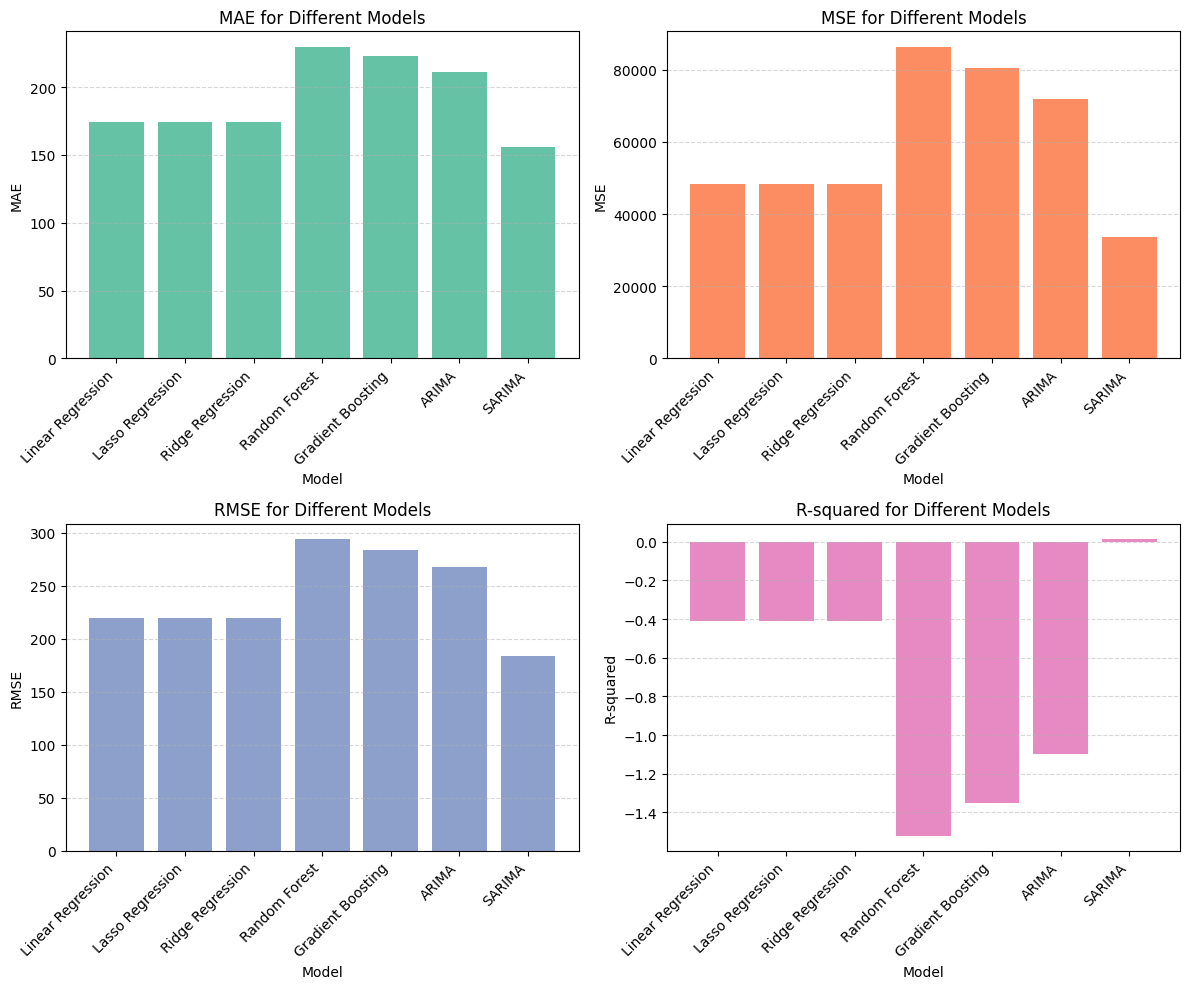

In [ ]:
# Define different colors for each chart
colors = sns.color_palette('Set2')

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()  # Flatten the subplot array for easier indexing
metrics = ['MAE', 'MSE', 'RMSE', 'R-squared']

for i, metric in enumerate(metrics):
    ax = axs[i]
    bars = ax.bar(model_performance['Model'], model_performance[metric], color=colors[i])
    ax.set_title(f'{metric} for Different Models')
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.set_xticklabels(model_performance['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# SARIMA is selected

5. Model Builiding

In [ ]:
# Filter the data from 2010 to 2021 for model training
train_data = df3[(df3['year'] >= 1999) & (df3['year'] <= 2023)]

# Prepare your time series data
X_train = train_data['year']
y_train = train_data['value']

# Initialize and fit the SARIMA model
sarima_model = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Print summary of SARIMA model
print(sarima_results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                   25
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -64.714
Date:                            Sun, 07 Apr 2024   AIC                            139.427
Time:                                    13:15:33   BIC                            141.852
Sample:                                         0   HQIC                           138.529
                                             - 25                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3569      0.413     -0.865      0.387      -1.166       0.452
ma.L1          0.9982      0.539   

6. Forecasting

In [ ]:
# Define future years predict from 2024 to 2029 i.e range between 2023 and 2030
future_years = range(2023, 2030)

# Reshape the future_years range object
future_years_reshaped = np.array(list(future_years)).reshape(-1, 1)

# Use the trained SARIMA model to make predictions for the future years
future_predictions = sarima_results.predict(start=len(y_train), end=len(y_train) + len(future_years) - 1, dynamic=True)

# Create a DataFrame to store the results
results_df = pd.DataFrame({'Year': future_years, 'Predicted_Value': future_predictions})

# Print or display the results
print(results_df)


    Year  Predicted_Value
25  2023       763.119460
26  2024       792.688623
27  2025       800.906886
28  2026       781.237603
29  2027       676.370581
30  2028       691.420996
31  2029       739.792871


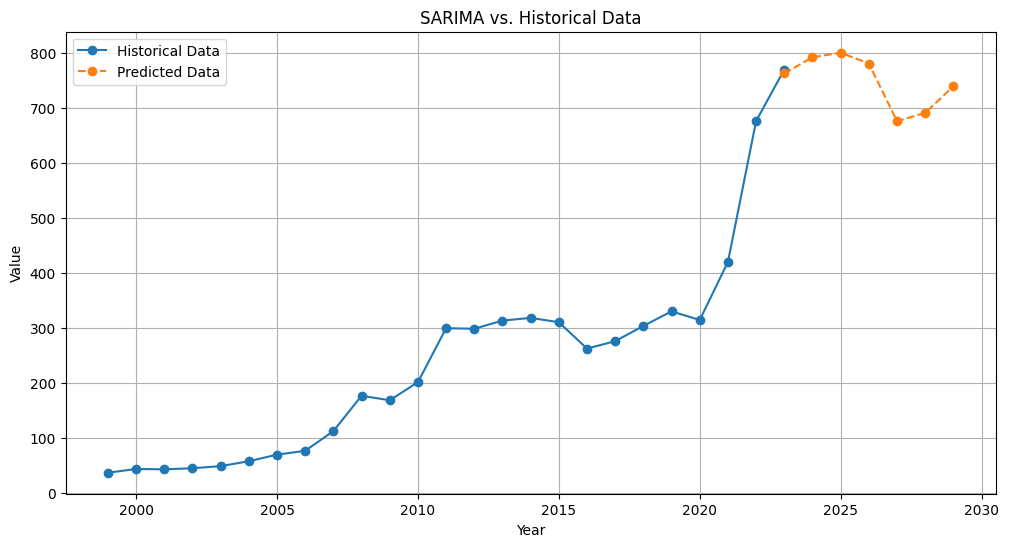

In [ ]:
# Plot the actual historical data and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(train_data['year'], train_data['value'], label='Historical Data', marker='o')
plt.plot(results_df['Year'], results_df['Predicted_Value'], label='Predicted Data', marker='o', linestyle='dashed')
plt.title('SARIMA vs. Historical Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()